In [6]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

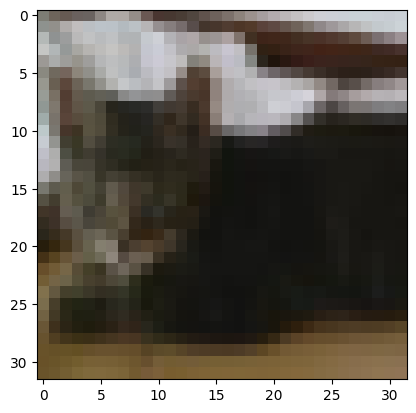

In [11]:
plt.imshow(x_train[9])

## Limpieza de Datos

In [12]:
# Limpieza de datos

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [14]:
num_clases = len(np.unique(y_train)) # -> 10
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

In [16]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape :', x_train.shape)

print('x_train:', x_train.shape[0])
print('val:', x_valid.shape[0])
print('test:', x_test.shape[0])

x_train shape : (40000, 32, 32, 3)
x_train: 40000
val: 5000
test: 10000


## CNN para Clasificación


In [17]:
base_filtros = 32
w_regulatizer = 1e-4

In [29]:
model = Sequential()
# Convolución 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:] ))
model.add(Activation('relu'))
# Convolución 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Convolución 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Convolución 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Convolución 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
# Convolución 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Clasificación - Flatten

model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 307,498 (1.17 MB)

 Trainable params: 307,498 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [31]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)

Epoch 1/100


I0000 00:00:1748485268.602312     111 service.cc:148] XLA service 0x7bd72000d790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748485268.604379     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748485268.604397     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748485269.027008     111 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748485274.977898     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 - 17s - 13ms/step - accuracy: 0.3572 - loss: 1.7896 - val_accuracy: 0.4960 - val_loss: 1.3864
Epoch 2/100
1250/1250 - 5s - 4ms/step - accuracy: 0.5315 - loss: 1.3409 - val_accuracy: 0.6066 - val_loss: 1.1353
Epoch 3/100
1250/1250 - 5s - 4ms/step - accuracy: 0.6085 - loss: 1.1592 - val_accuracy: 0.6038 - val_loss: 1.2099
Epoch 4/100
1250/1250 - 5s - 4ms/step - accuracy: 0.6506 - loss: 1.0542 - val_accuracy: 0.6640 - val_loss: 1.0432
Epoch 5/100
1250/1250 - 5s - 4ms/step - accuracy: 0.6751 - loss: 0.9940 - val_accuracy: 0.7036 - val_loss: 0.8857
Epoch 6/100
1250/1250 - 5s - 4ms/step - accuracy: 0.6940 - loss: 0.9480 - val_accuracy: 0.7186 - val_loss: 0.8898
Epoch 7/100
1250/1250 - 5s - 4ms/step - accuracy: 0.7128 - loss: 0.9077 - val_accuracy: 0.7438 - val_loss: 0.8207
Epoch 8/100
1250/1250 - 5s - 4ms/step - accuracy: 0.7215 - loss: 0.8901 - val_accuracy: 0.7256 - val_loss: 0.8973
Epoch 9/100
1250/1250 - 5s - 4ms/step - accuracy: 0.7321 - loss: 0.8722 - val_accuracy: 0.7310 - v

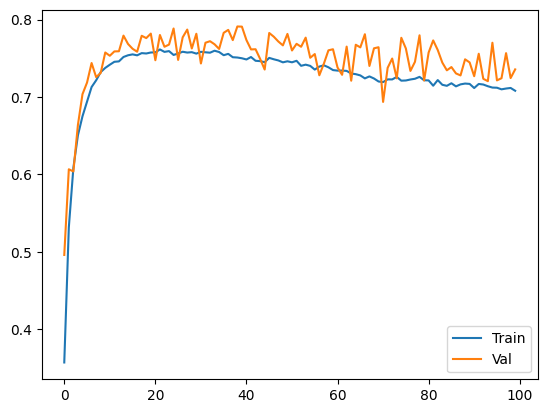

In [32]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [43]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'loss \t\t: {loss:.4f}')
print(f'Accurcy \t: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7475 - loss: 0.9047
loss 		: 0.9142
Accurcy 	: 0.7405
